In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  7 21:35:24 2018
@author: biomass_team
"""

import numpy as np 
import matplotlib.pyplot as plt 
import struct
#from Signal_v2 import * 

#import pywt
exec(open("Signal_v2.py").read(), globals()) # réexecuter le cellule permet de prendre en compte les modifs du fichiers fonctions.py
exec(open("Analisys_functions.py").read(), globals()) # réexecuter le cellule permet de prendre en compte les modifs du fichiers fonctions.py

In [2]:
FREQ = [[1],[1, 50, 10],[1,5,10,20,50,100,200,500],[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]]
NOM = ["Sinusoide","Sinusoide triple","Sinusoide octuple",'Sinusoide crenau']
INTENSITY = [None, None,None,[4, 4./3, 1, 4./5, 4./7, 4./9, 4./11, 4./13, 4./15, 4./17, 4./19]]
A = [0,0,0,0]
B = [1,5,10,10]
NB_POINTS = [100,1000,10000,10000]
signaux = signaux_test(FREQ, A,B,NB_POINTS,INTENSITY,NOM)

#signaux physique
data_list0 = ouverture_fichier("bt0VV_4lks_d45-60_dt4h.dat")
data_list1 = ouverture_fichier("tst.dat")

dt0 = 15/(60*24)  # mesure toutes les 15 minutes, échelles temporelles en jours
signaux += [Signal(signal = np.asarray(data_list0)[:,2].astype(float),nom= "signal radar", a=0, b=dt0*len(data_list0))]
#humidite = []
for i,j in enumerate(range(2,11)):
    s = np.asarray(data_list1)[:,j].astype(float)
    nom = 'fichier "tst.dat" signal '+str(i)
    dt1 = 10/(60*24)  # mesure toutes les 10 minutes, échelles temporelles en jours
    signal = Signal(s, nom, a=0, b=dt1*len(data_list1))
    #humidite += [signal]
    signaux += [signal]

In [3]:
sinusoideTriple = signaux[1]

In [4]:
fourier_pur = sinusoideTriple.fft()
dsp_pur = sinusoideTriple.dsp()

Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     


In [5]:
Bruit = np.arange(0, 2, 0.1)
ErreurSignal = np.zeros(len(Bruit))
ErreurFFT = np.zeros(len(Bruit))
ErreurDSP = np.zeros(len(Bruit))

# Sans normalisations

# Avec normalisations

In [24]:
signalbruite = []
Fft_bruite = []
Dsp_bruite = []


sinusoideTriple.signal = sinusoideTriple.signal / np.linalg.norm(sinusoideTriple.signal)
fourier_pur = sinusoideTriple.fft()
fourier_pur = fourier_pur/np.linalg.norm(fourier_pur)
dsp_pur = sinusoideTriple.dsp() 
dsp_pur = dsp_pur/np.linalg.norm(dsp_pur)


for i, bruit in enumerate(Bruit):
    sinusoideTripleBruite = Signal(sinusoideTriple.signal, sinusoideTriple.nom+"_bruite", a=sinusoideTriple.a, b=sinusoideTriple.b)
    sinusoideTripleBruite.rajoutBruit(bruit)
    sinusoideTripleBruite.signal = sinusoideTripleBruite.signal / np.linalg.norm(sinusoideTripleBruite.signal)
    sinusoideTripleBruite.signal = sinusoideTripleBruite.signal/np.linalg.norm(sinusoideTripleBruite.signal)
    signalbruite += [sinusoideTripleBruite]
    ErreurSignal[i] = np.linalg.norm(sinusoideTriple.signal - sinusoideTripleBruite.signal)
    fft_bruite = sinusoideTripleBruite.fft()
    fft_bruite = fft_bruite / np.linalg.norm(fft_bruite)
    Fft_bruite += [fft_bruite]
    ErreurFFT[i] = np.linalg.norm(fourier_pur - fft_bruite)
    dsp_bruite = sinusoideTripleBruite.dsp()
    dsp_bruite = dsp_bruite / np.linalg.norm(dsp_bruite)
    Dsp_bruite += [dsp_bruite]
    ErreurDSP[i] = np.linalg.norm(dsp_pur - dsp_bruite)

Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxx     ] 82.6%                                     

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [                              ] 0.9%                                      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [                              ] 0.4%                                      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxx                  ] 40.0%                                     

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 99.9%                                     
Computation of the autocorralation
 [xxxxxxxxxxxxxxxxxx            ] 58.8%                                     

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



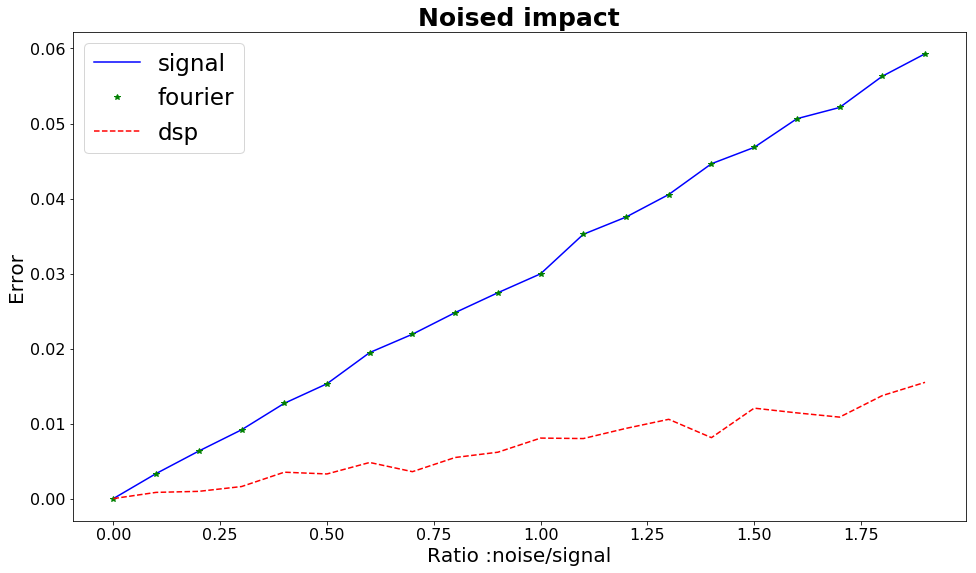

In [37]:
plt.figure(figsize=(16,9))
plt.plot(Bruit, ErreurSignal, "b-", label="signal")

plt.plot(Bruit, ErreurFFT, "g*", label="fourier")
plt.plot(Bruit, ErreurDSP, "r--", label="dsp")
plt.legend(fontsize=23)
plt.xlabel("Ratio :noise/signal",fontsize=20)
plt.ylabel("Error",fontsize=20)
plt.title("Noised impact",fontsize=25,fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

le bruit est  0.0


/usr/local/insa/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


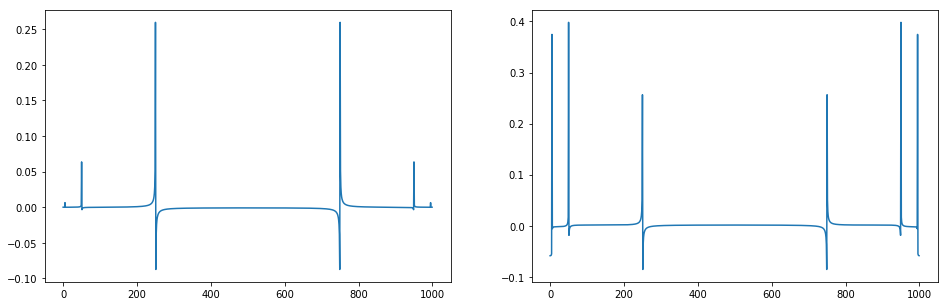

le bruit est  0.1


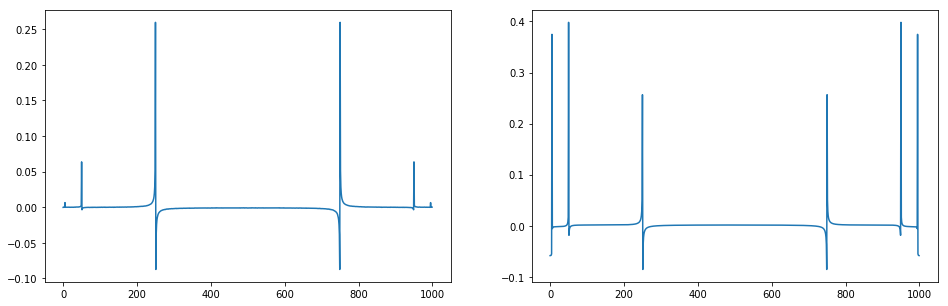

le bruit est  0.2


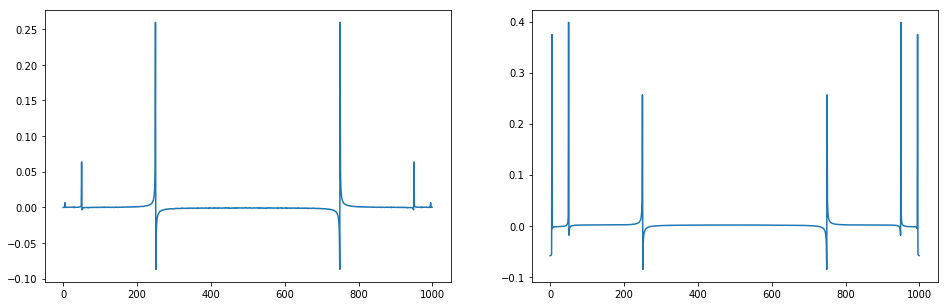

le bruit est  0.30000000000000004


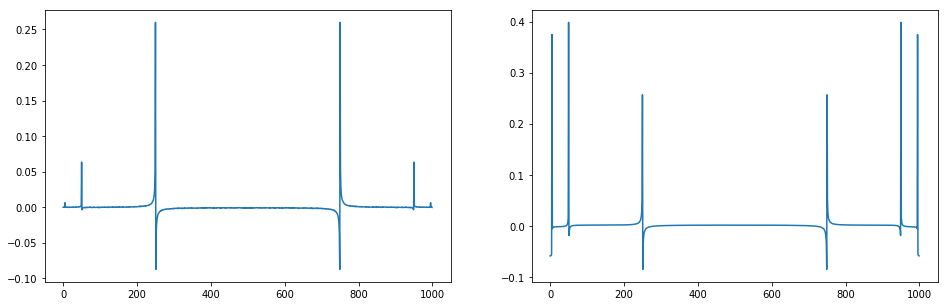

le bruit est  0.4


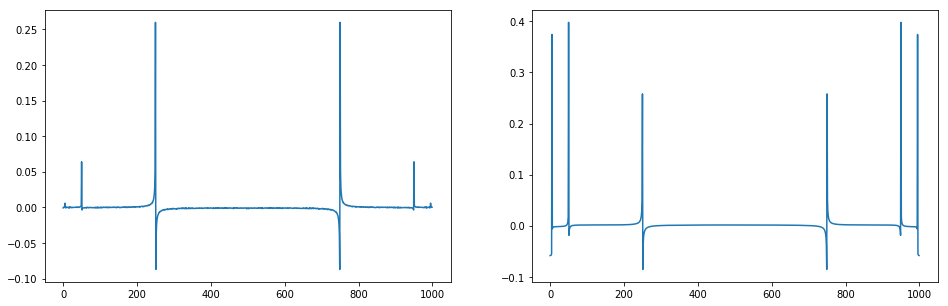

le bruit est  0.5


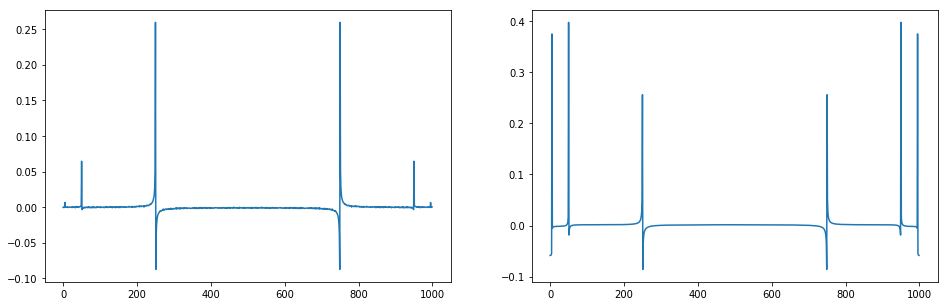

le bruit est  0.6000000000000001


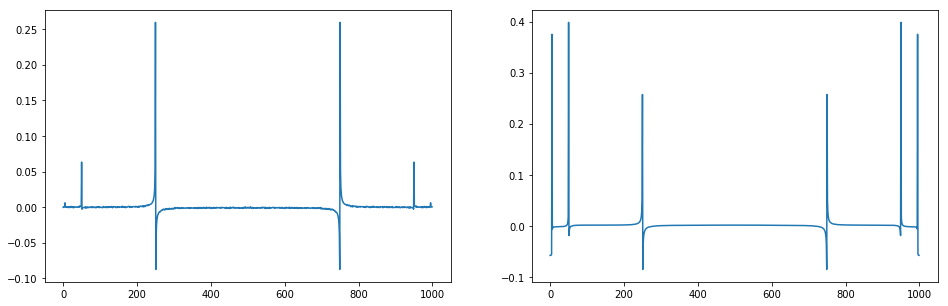

le bruit est  0.7000000000000001


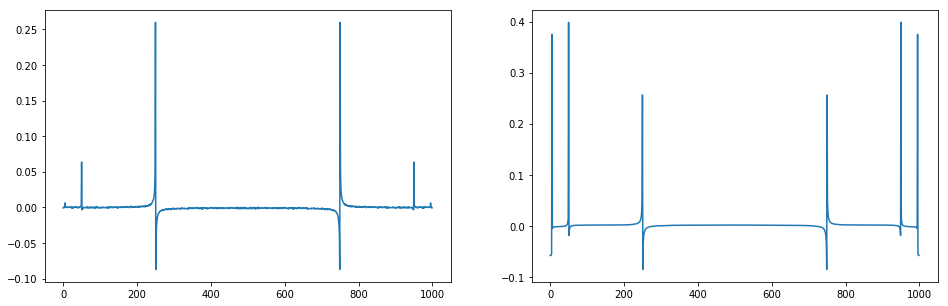

le bruit est  0.8


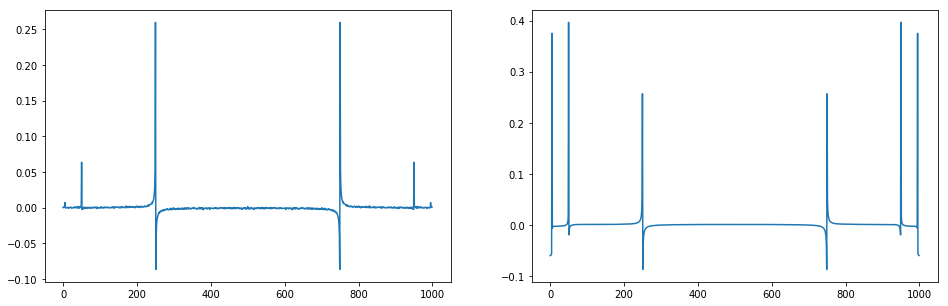

le bruit est  0.9


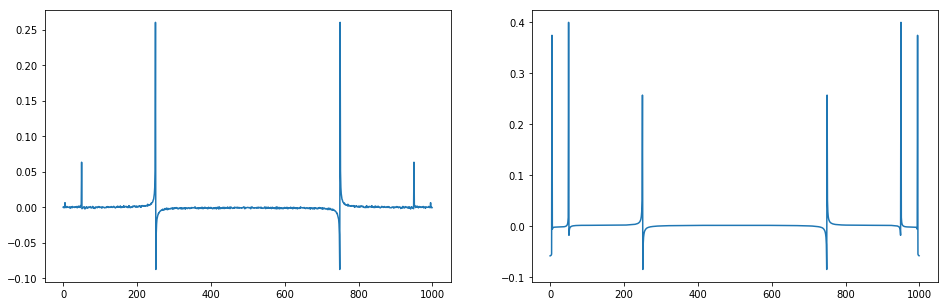

le bruit est  1.0


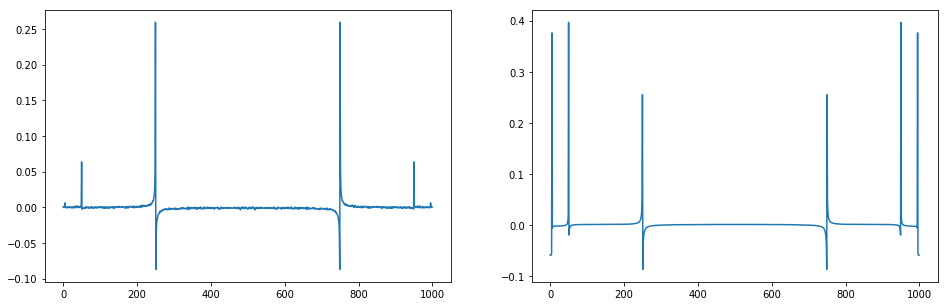

le bruit est  1.1


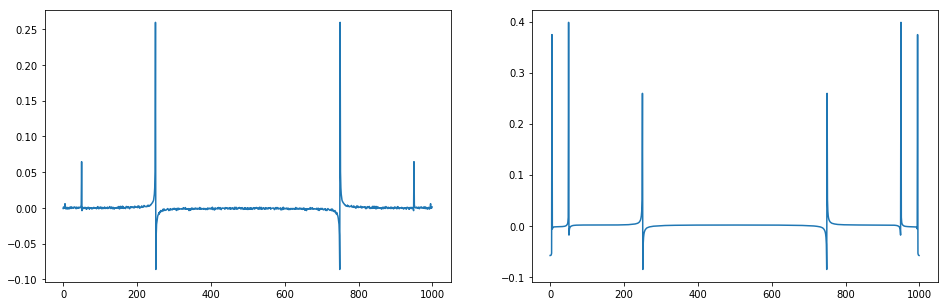

le bruit est  1.2000000000000002


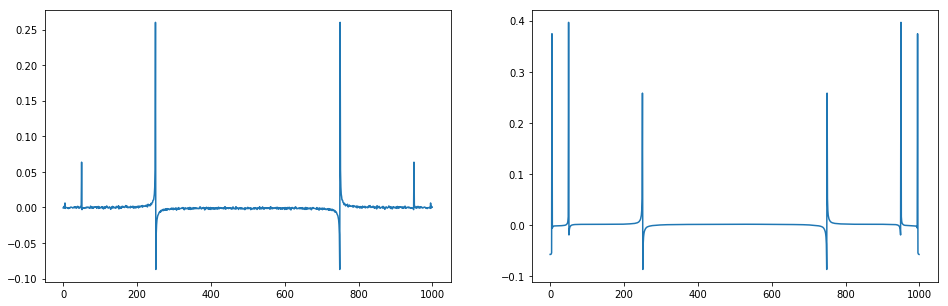

le bruit est  1.3


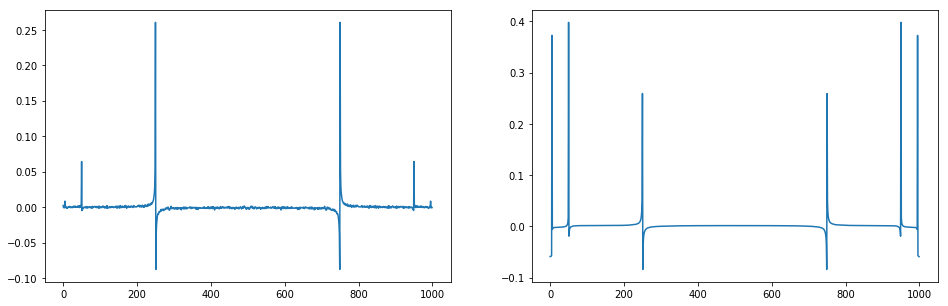

le bruit est  1.4000000000000001


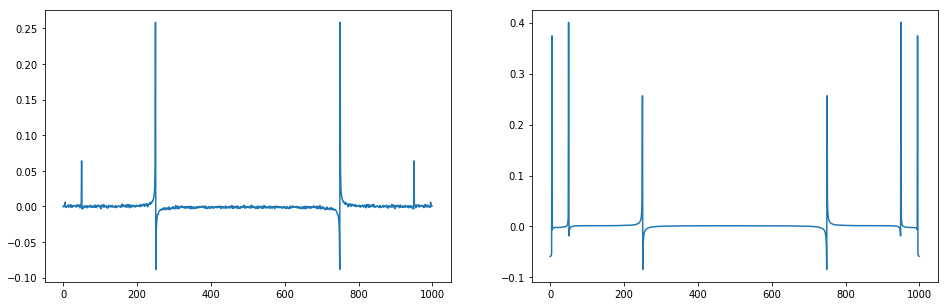

le bruit est  1.5


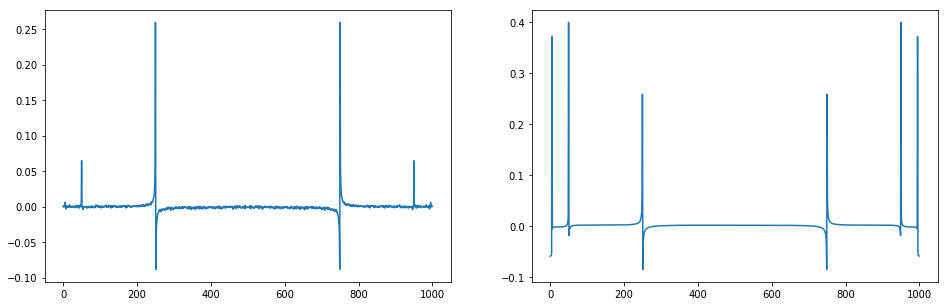

le bruit est  1.6


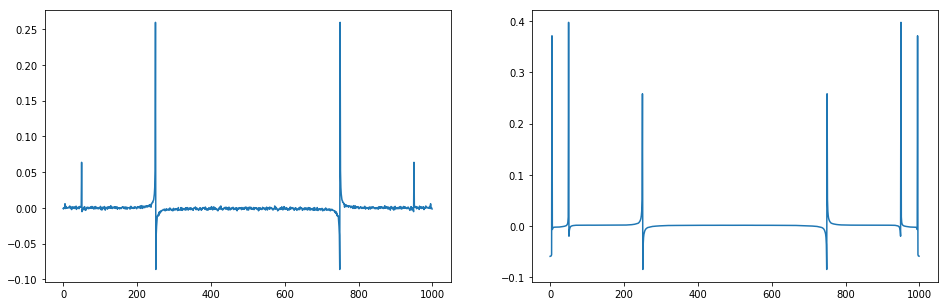

le bruit est  1.7000000000000002


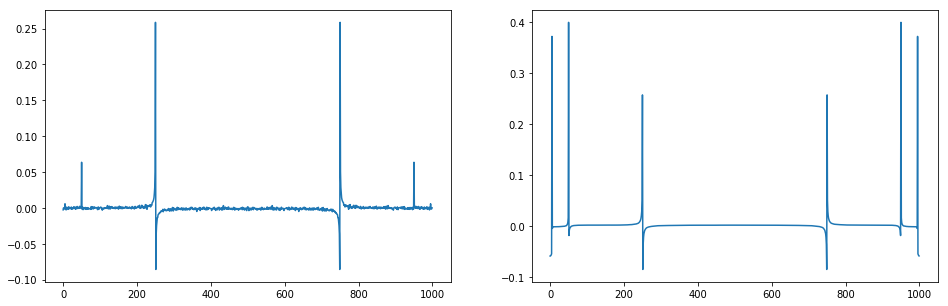

le bruit est  1.8


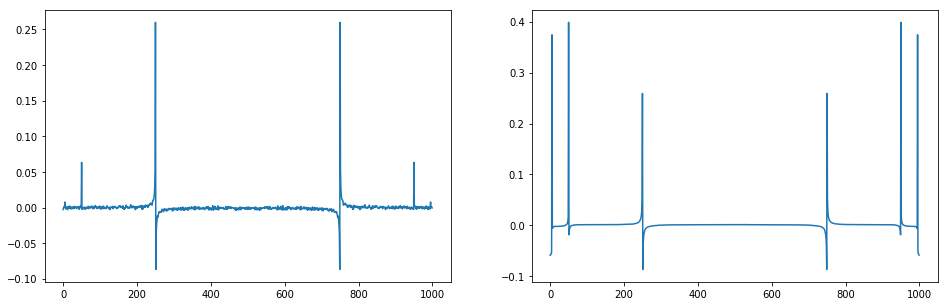

le bruit est  1.9000000000000001


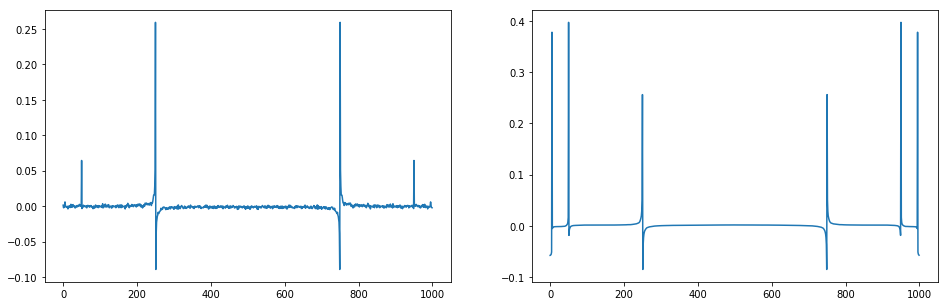

In [26]:
for i in range(len(Dsp_bruite)):
    print("le bruit est ", Bruit[i])
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.plot(Fft_bruite[i])
    plt.subplot(1,2,2)
    plt.plot(Dsp_bruite[i])
    plt.show()
    